<a href="https://colab.research.google.com/github/shahriar31028/CSE366---Communication-Engineering-Lab-Assignment/blob/main/Task%2302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math

**Line Coding Encoding - Unipolar - Non Return to Zero(NRZ)**

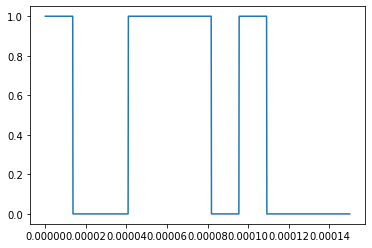

In [47]:
time_period = 10e-6 
data_elements = np.array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])    


bit_rate = 1/time_period  
Fs = 4*bit_rate   

bit_length = len(data_elements)   

T = np.linspace(0,time_period,100)

line_coding = np.array([])
for i in range(bit_length):
  temp = data_elements[i]* np.ones(len(T))
  line_coding = np.append(line_coding, temp)
time_vector = np.linspace(0,N*time_period,len(line_coding))

plt.plot(time_vector,line_coding)
plt.show()

**Line Coding Decoding - Unipolar - Non Return to Zero(NRZ)**

In [48]:

value = []
cnt=0
for i in range(len(time_vector)):
  if time_vector[i]*bit_rate > cnt:
    cnt = cnt + 1
    value.append(int(line_coding[i]))

print(value)

[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0]


**Block Coding**







**Block coding $4B/5B$ with $NRZ-I$ line coding scheme**

In [49]:
mB = 4
nB = 5
block_coding_mapping_codes = {
# encoding map
"0000": "11110",
"0001": "01001",
"0010": "10100",
"0011": "10101",
"0100": "01010",
"0101": "01011",
"0110": "01110",
"0111": "01111",
"1000": "10010",
"1001": "10011",
"1010": "10110",
"1011": "10111",
"1100": "11010",
"1101": "11011",
"1110": "11100",
"1111": "11101",
# decoding map
"11110": "0000",
"01001": "0001",
"10100": "0010",
"10101": "0011",
"01010": "0100",
"01011": "0101",
"01110": "0110",
"01111": "0111",
"10010": "1000",
"10011": "1001",
"10110": "1010",
"10111": "1011",
"11010": "1100",
"11011": "1101",
"11100": "1110",
"11101": "1111",

}

def mapping(sequence_of_bits):
  return block_coding_mapping_codes["".join(map(str, sequence_of_bits))]
  

def encoding(sequence_of_bits, mB, nB):
  
  if len(sequence_of_bits) % mB != 0:
    
    ext_len = (((len(sequence_of_bits)// mB) + 1) * mB) - len(sequence_of_bits)
    ext = np.array(np.zeros(ext_len), dtype=int)
    bits = np.append(sequence_of_bits, ext)
  
  encoded_bits_str = ""
  for i in range(0, len(sequence_of_bits), mB):
    encoded_bits_str += mapping(bits[i:i+mB])
  

  encoded_bits_list = list(encoded_bits_str)
  encoded_bits_map = map(int, encoded_bits_list)
  encoded_bits = np.array(list(encoded_bits_map))
  return encoded_bits


def decoding(sequence_of_bits, mB, nB):
  if len(sequence_of_bits) % nB != 0:
    print("Invalid length, Decoding Not possible!")
    return
  decoded_bits_str = ""
  for i in range(0, len(sequence_of_bits), nB):
    decoded_bits_str += mapping(bits[i:i+nB])
 
 
  decoded_bits_list = list(decoded_bits_str)
  decoded_bits_map = map(int, decoded_bits_list)
  decoded_bits = np.array(list(decoded_bits_map))
  return decoded_bits

**$4B/5B$ Encoding**

In [51]:
sequence_of_bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int) 
sequence_of_bits = encoding(sequence_of_bits, mB, nB)


**$NRZ-I$ Line Coding Encoding**

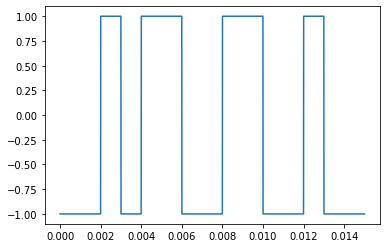

In [50]:
time_period = 10e-4  
bit_rate = 1/time_period  

Fs = 4*bit_rate    
bit_length = len(sequence_of_bits)   

T = np.linspace(0,time_period, mB * 100)

line_coding = np.array([])
last_bit = 1

for i in range(bit_length):
  if sequence_of_bits[i] == 1:
    temp = (-1) * last_bit * np.ones(len(T))
    last_bit = -last_bit
  else:
    temp = last_bit * np.ones(len(T))
  line_coding = np.append(line_coding, temp)
time_vector = np.linspace(0,N*time_period,len(line_coding))

plt.plot(time_vector, line_coding)
plt.show()

**$NRZ-I$ Line Coding Decoding**

In [52]:
value = []
val = 0
last_bit = 1

for i in range(len(time_vector)):

  if t[i]*bit_rate > val:
    val = val + 1
    if x[i] != last_bit:
      value.append(1)
      last_bit=-last_bit
    else:
      value.append(0)

print(value)

[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]


**$4B/5B$ Decoding**

In [53]:
decoded_result = decoding(value, mB, nB)
print(decoded_result)

[1 0 1 1 0 1 0 0 1 0 1 0]
